In [5]:

import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime




In [6]:

subdirectory = 'merged_by_country_bert_processed_tweets'

# Read whole data set and merged it as a df 
merged_df = pd.DataFrame()

for filename in os.listdir(subdirectory):
    
    if filename.endswith('.csv'):
        file_path = os.path.join(subdirectory, filename)

        # Read the CSV file with UTF-8 encoding
        df = pd.read_csv(file_path, encoding='UTF-8', low_memory=False)

        merged_df = pd.concat([merged_df, df], ignore_index=True)

# display(merged_df)


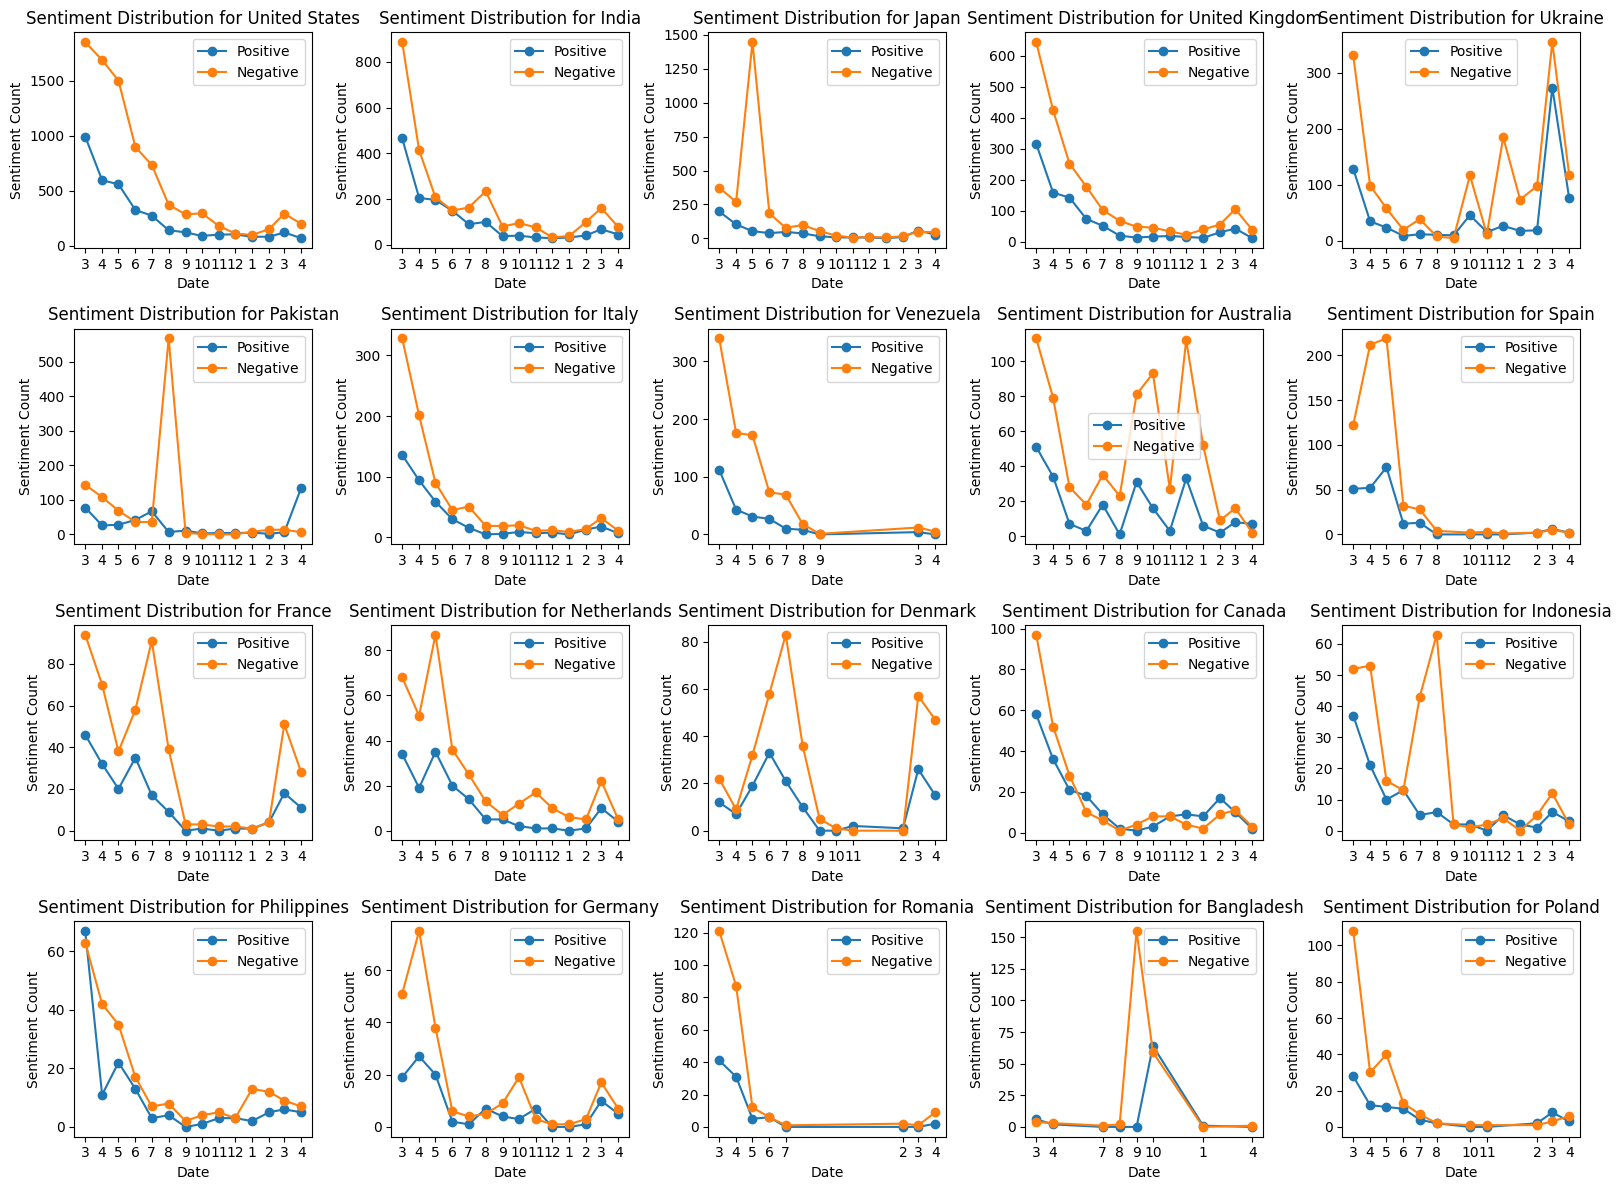

In [7]:


# This function plots the distribution of positive and negative sentiments for the top 20 countries
# based on a provided dataset, grouped by country and month.
# Steps:
# 1. Convert date format and filter DataFrame based on the date range.
# 2. Group the DataFrame by country, month, and sentiment, and calculate the sum of sentiments.
# 3. Select the top 20 countries and set up a grid format for plotting.
# 4. Create a figure with multiple subplots, each subplot representing one of the top 20 countries.
# 5. Plot the positive and negative sentiment counts for each country in its respective subplot.
# 6. Set the xlabel, ylabel, title, and legend for each subplot, and modify the x-axis tick labels.
# 7. Apply a tight layout to the figure and display the final plot.


def plot_sentiment_distribution(merged_df):
    # Convert date data format
    merged_df['date'] = pd.to_datetime(merged_df['date'].str[:10], format="%Y-%m-%d", errors='coerce')

    # Filter the dataframe based on the date range
    start_date = datetime.datetime(2022, 3, 1)
    end_date = datetime.datetime(2023, 4, 30)
    filtered_df = merged_df[(merged_df['date'] >= start_date) & (merged_df['date'] <= end_date)]

    # Remove rows with NaT values
    filtered_df = filtered_df.dropna(subset=['date'])

    # Group by country, month, and sentiment, and calculate the sum of sentiments
    grouped = filtered_df.groupby(['country', filtered_df['date'].dt.to_period('M'), 'sentiment']).size().unstack().fillna(0)

    # Rename columns
    grouped.columns = ['Negative', 'Positive']

    # Select the top 20 countries
    top_20_countries = grouped.groupby('country').sum().sum(axis=1).nlargest(20).index

    # Plot in a grid format
    num_rows = 4
    num_cols = 5

    # Adjust the country list into a grid format
    if len(top_20_countries) > num_rows * num_cols:
        top_20_countries = top_20_countries[:num_rows * num_cols]
    else:
        top_20_countries = np.pad(top_20_countries, (0, num_rows * num_cols - len(top_20_countries)), mode='constant', constant_values='')

    # Plot in a grid format
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(16, 12))

    for i, country in enumerate(top_20_countries):
        country_data = grouped.loc[country]

        # Calculate total sentiment counts for each month
        monthly_counts = country_data.groupby(country_data.index).sum()

        row = i // num_cols
        col = i % num_cols
        ax = axs[row, col]

        x = monthly_counts.index.to_timestamp()
        y_positive = monthly_counts['Positive'].values
        y_negative = monthly_counts['Negative'].values

        ax.plot(x, y_positive, marker='o', linestyle='-', label='Positive')
        ax.plot(x, y_negative, marker='o', linestyle='-', label='Negative')

        ax.set_xlabel('Date')
        ax.set_ylabel('Sentiment Count')
        ax.set_title(f'Sentiment Distribution for {country}')
        ax.legend()

        # Modify x-axis tick labels
        x_labels = [label.month if label.month <= 12 else label.month - 12 for label in x]
        ax.set_xticks(x)
        ax.set_xticklabels(x_labels)

    plt.tight_layout()
    plt.show()

plot_sentiment_distribution(merged_df)
